<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Build_Basic_Custus_Model_(Wide_and_Deep_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

# Build the Model

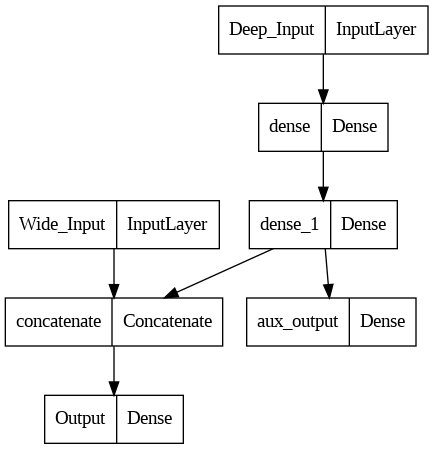

In [4]:
# Define inputs
input_a = Input(shape = [1],name = 'Wide_Input')
input_b = Input(shape = [1],name = 'Deep_Input')

# Define deep path
hidden_1 = Dense(30,activation = 'relu')(input_b)
hidden_2 = Dense(30,activation = 'relu')(hidden_1)

# Define merged both
concat = concatenate([input_a,hidden_2])
output = Dense(1,name = 'Output')(concat)

# Define another output for the deep path
aux_output = Dense(1,name = 'aux_output')(hidden_2)

# Build the model
model = Model(inputs = [input_a,input_b],outputs = [output,aux_output])

# Visualize the architecture
plot_model(model)

# Implement as a Class

In [6]:
# Inherit from the model base class
class WideAndDeepModel(Model):
  def __init__(self,units = 30,activation = 'relu',**kwargs):
    super().__init__(**kwargs)
    self.hidden1 = Dense(units,activation = activation)
    self.hidden2 = Dense(units,activation = activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)

  def call(self,inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden(hidden1)
    concat = concatenate([input_A,hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output,aux_output

In [11]:
# Create an instance of the model
model = WideAndDeepModel()